# Pymaceuticals Inc.
---

### Analysis
The bar graph shows that Capomulin is the most commonly used drug regimen with 230 mice, while Zoniferol has the lowest number of mice at 182. After removing duplicates, the total number of mice is 248, with 124 females and 125 males.

The correlation between mouse weight and average tumor volume is a strong positive correlation of 0.84. This means that as mouse weight increases, the average tumor volume also increases.

The regression analysis helps predict how much the average tumor volume will change with changes in mouse weight. The R-squared value of 0.70 indicates that the model fits the data well and can predict outcomes with reasonable accuracy. Higher R-squared values suggest smaller differences between observed and fitted data, and in this case, the model explains 70% of the variation in response variable around its mean.

Of the selected treatments, Capomulin and Ramicane have shown to be more effective in reducing tumor size.



In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how = "left")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [85]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
#print.DataFrame(duplicate_mice)<- i tried this
#duplicate_mice_df = merged_df.loc[merged_df["Mouse ID"]=="g989",:]
duplicate_ids = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_ids

array(['g989'], dtype=object)

In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_data = merged_df.drop_duplicates(["Mouse ID"],inplace=False)
#clean_data.head()
clean_without_dup= merged_df[merged_df['Mouse ID'].isin(duplicate_ids)==False]
clean_without_dup.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [89]:
# Checking the number of mice in the clean DataFrame.

clean_without_dup.nunique()["Mouse ID"]

248

## Summary Statistics

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#clean_without_dup.describe()

sem = clean_without_dup.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mean = clean_without_dup.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_without_dup.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_without_dup.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = clean_without_dup.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

summary_drug_regimen = pd.DataFrame ({
"Mean Tumor Volume ": mean,
"Median Tumor Volume ": median,
"Variance Tumore Volume ": variance,
"St.Deviation Tumor Volume ": standard_deviation,
"SEM Tumor Volume": sem

})

summary_drug_regimen


,Mean Tumor Volume,Median Tumor Volume,Variance Tumore Volume,St.Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg = clean_without_dup.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

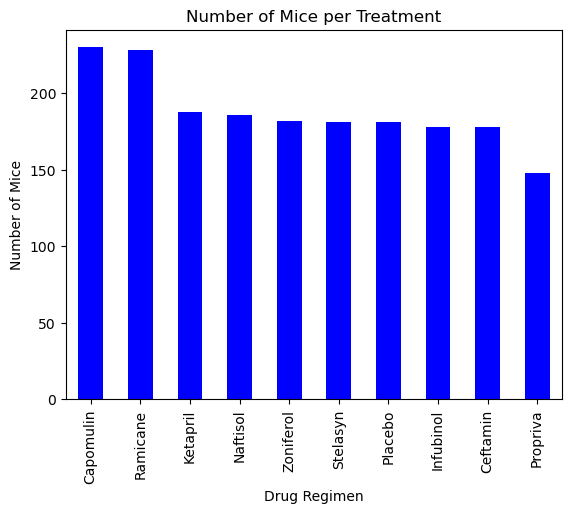

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#ANSWER:we have to first have the mice count in cleaned data:
mice_count = clean_without_dup["Drug Regimen"].value_counts()
mice_count
#now to plt a bar chart in pandas, i learned this function from internet:
plot_pandas = mice_count.plot.bar(color='b') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

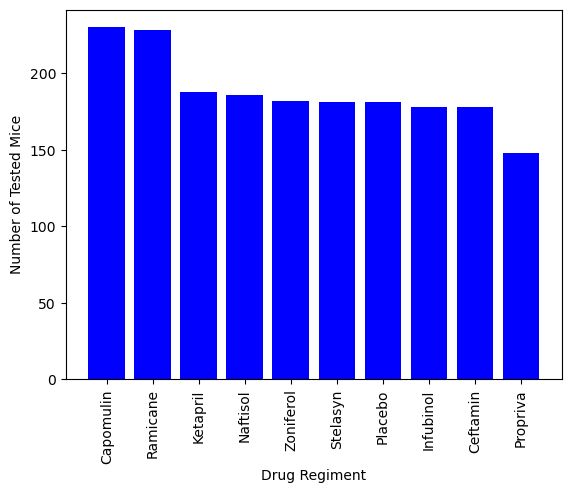

In [93]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color ='blue', label='Mice Count')
plt.xlabel('Drug Regiment')
plt.ylabel("Number of Tested Mice")
plt.xticks(rotation='vertical')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

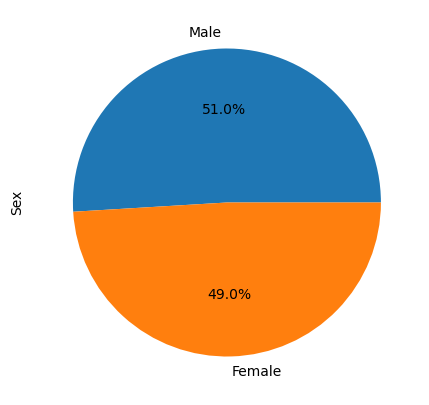

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#ANSWER:we have to first have the mice count in cleaned data:
mice_count_gender = clean_without_dup["Sex"].value_counts()
mice_count_gender
#now to plt a pie chart in pandas, i learned this function from internet:
mice_count_gender.plot(kind='pie', y='Count', figsize=(5, 5), autopct='%1.1f%%')

plt.show


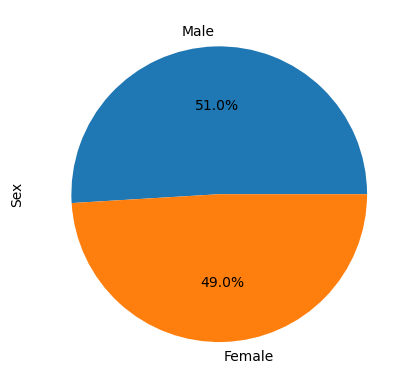

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#color =['blue', 'orange']
#labels ="Sex"
#explode= 0
#data = mice_count_gender
#plt.pie(data,size= 5, explode='explode', labels="Sex", colors=color)
#plt.show
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = mice_count_gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#tumor_volume = clean_without_dup.loc[clean_without_dup['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]['Tumor Volume (mm3)']
#tumor_volume

capomulin = clean_without_dup.loc[clean_without_dup["Drug Regimen"] == "Capomulin",:]
ramicane = clean_without_dup.loc[clean_without_dup["Drug Regimen"] == "Ramicane",:]
infubinol = clean_without_dup.loc[clean_without_dup["Drug Regimen"] == "Infubinol",:]
ceftamin = clean_without_dup.loc[clean_without_dup["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_without_dup.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data2 = max_tumor.merge(clean_without_dup,on=['Mouse ID','Timepoint'],how="left")
merged_data2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(248):
    DR=merged_data2.iloc[i,:]["Drug Regimen"]
    Tum=merged_data2.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)
            continue
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]

for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = merged_data2.loc[merged_data2["Drug Regimen"]==Treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")

    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")

    #Printing any potential outliers
    for Tumor in Tumors[Num]:
        if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")


The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infub

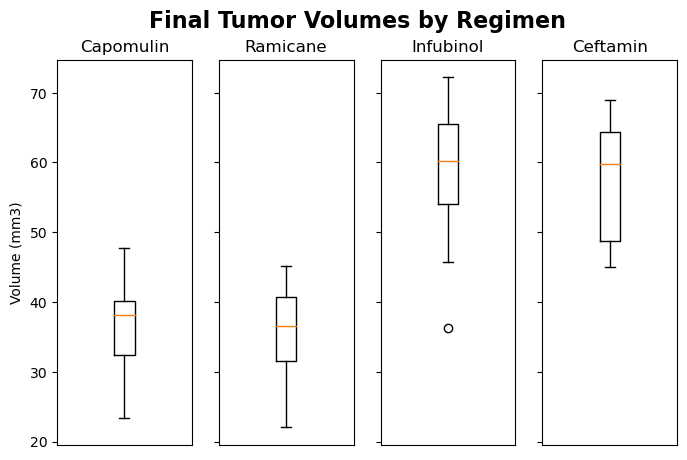

In [98]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(8,5))
fig.suptitle("Final Tumor Volumes by Regimen", fontsize=16, fontweight="bold")

ax1.set_ylabel('Volume (mm3)')
ax1.set_title(Treatments[0])
ax1.boxplot(Tumors[0])
ax1.set_xticks([])

ax2.set_title(Treatments[1])
ax2.boxplot(Tumors[1])
ax2.set_xticks([])

ax3.set_title(Treatments[2])
ax3.boxplot(Tumors[2])
ax3.set_xticks([])

ax4.set_title(Treatments[3])
ax4.boxplot(Tumors[3])
ax4.set_xticks([])

plt.show()

## Line and Scatter Plots

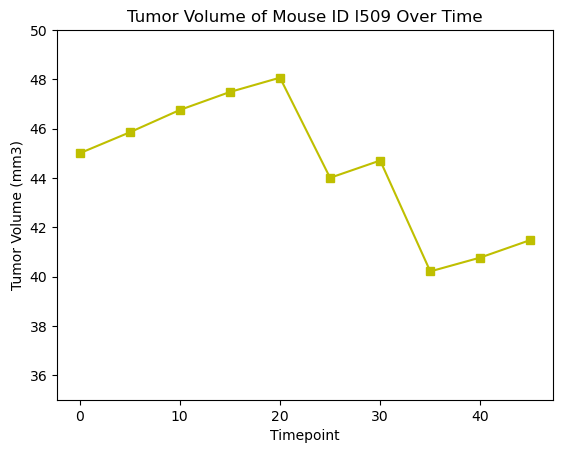

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treated_Mouse=clean_without_dup.loc[clean_without_dup["Mouse ID"]=='l509',:]
x_axis=treated_Mouse["Timepoint"].count()
plt.plot(treated_Mouse["Timepoint"],treated_Mouse["Tumor Volume (mm3)"],marker='s',color="y")
plt.title("Tumor Volume of Mouse ID l509 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(35,50)
plt.show()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

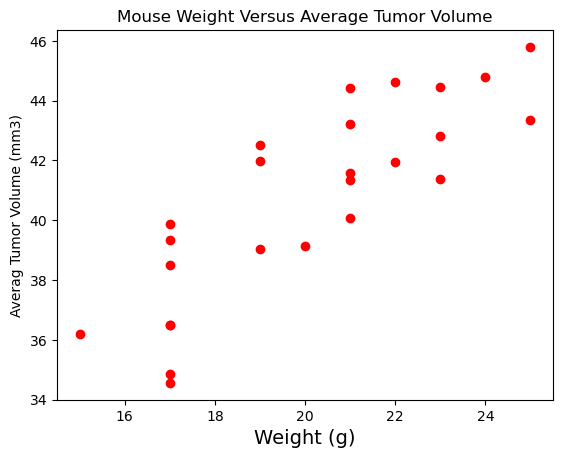

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


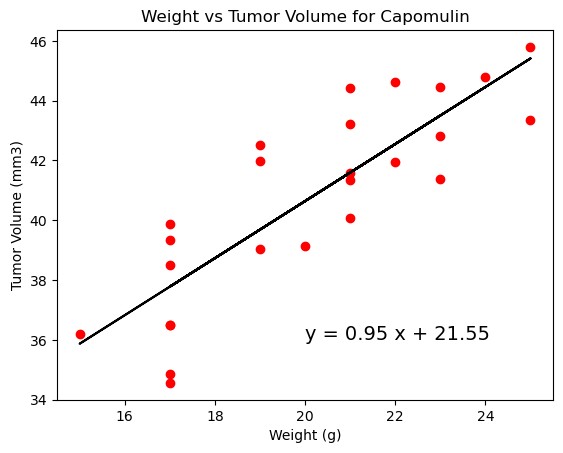

In [101]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='r')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='black')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
